In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# credits: https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11093fe48>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11093e898>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11093e7b8>)

In [4]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [6]:
# xi's and yi's --> training dataset
# yi is a 10-dimensional vector because of one_hot=True i.e labels are one-hot encoded values now. 
print(mnist.train.images.shape,mnist.train.labels.shape)

(55000, 784) (55000, 10)


In [7]:
# validation dataset (same arguments as above)
print(mnist.validation.images.shape,mnist.validation.labels.shape)

(5000, 784) (5000, 10)


In [8]:
# test dataset (same arguments as above)
print(mnist.test.images.shape,mnist.test.labels.shape)

(10000, 784) (10000, 10)


In [9]:
# Get a list of devices like GPUs and CPUs available to TF

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10018593012655732611
]


In [10]:
# for training 
x_is = tf.placeholder(tf.float32, [None, 784])
# We need this for the input layer of NN

In [11]:
print(x_is)   # mini_batch structure(placeholder) for datapoints, in each of the iterations while training NN

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)


In [12]:
print(x_is.shape)

(?, 784)


In [13]:
# for training (y_trues)
y_true_is = tf.placeholder(tf.float32, [None,10]) 
# We need this, to compare it with the output of last layer i.e softmax layer.
# For multiclass-classification task, we would use, mostly softmax layer as our last layer while contructing NN

In [14]:
print(y_true_is)   # mini_batch structure for labels, in each of the iterations while training NN.

Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [15]:
print(y_true_is.shape)

(?, 10)


In [16]:
# these are the variables/parameters of a model(NN).
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [17]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>


In [18]:
# y_hats
y_predicted_is = tf.nn.softmax(tf.matmul(x_is,W) + b)
# initially this would be in terms of vaiable W only, and then W's would be updated based on backprop.
# we would have our final optimal W's at the end of all iterations with mini-batch sizes.

In [19]:
print(y_predicted_is) # predicted y_is for the mini-batch structure

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [20]:
# defining a loss function

In [21]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_true_is * tf.log(y_predicted_is), reduction_indices=[1]))
# it is negate of average of log of probability of correct class label.

In [22]:
# it is an optimizer i.e batch SGD with a constant learning rate
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [23]:
sess = tf.InteractiveSession()

In [24]:
# at this point, when calling .run(), it would initialize Variables defined in previous stages i.e W,b,..etc if any
tf.global_variables_initializer().run()

In [25]:
batch_xs,batch_ys = mnist.train.next_batch(100)
print(batch_xs.shape,batch_ys.shape)

(100, 784) (100, 10)


In [26]:
# We run train_step feeding in the batches data to replace the placeholders
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x_is: batch_xs, y_true_is: batch_ys})
# above is the training of NN i.e it would update weights to the optimal value

In [27]:
# Now, since training is finished, we have optimal weights, now we can proceed with test dataset

In [28]:
correct_prediction = tf.equal(tf.argmax(y_predicted_is,1), tf.argmax(y_true_is,1))

In [29]:
print(correct_prediction)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [30]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
print(accuracy)

Tensor("Mean_1:0", shape=(), dtype=float32)


In [32]:
print(sess.run(accuracy, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels}))
# Always remember that we put that thing as a first parameter in run(), which has all the other variables and now 
# everything would happen after placing values in placeholders.

0.8994


In [33]:
# Now Putting Everything Together

In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plt_dynamic(epoch_list, avg_train_loss_list, avg_test_loss_list, ax):
    ax.plot(epoch_list, avg_train_loss_list, 'b', label="Train Loss")
    ax.plot(epoch_list, avg_test_loss_list, 'r', label="Test Loss")
    if len(epoch_list)==1:
        plt.legend()
    fig.canvas.draw()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



<IPython.core.display.Javascript object>


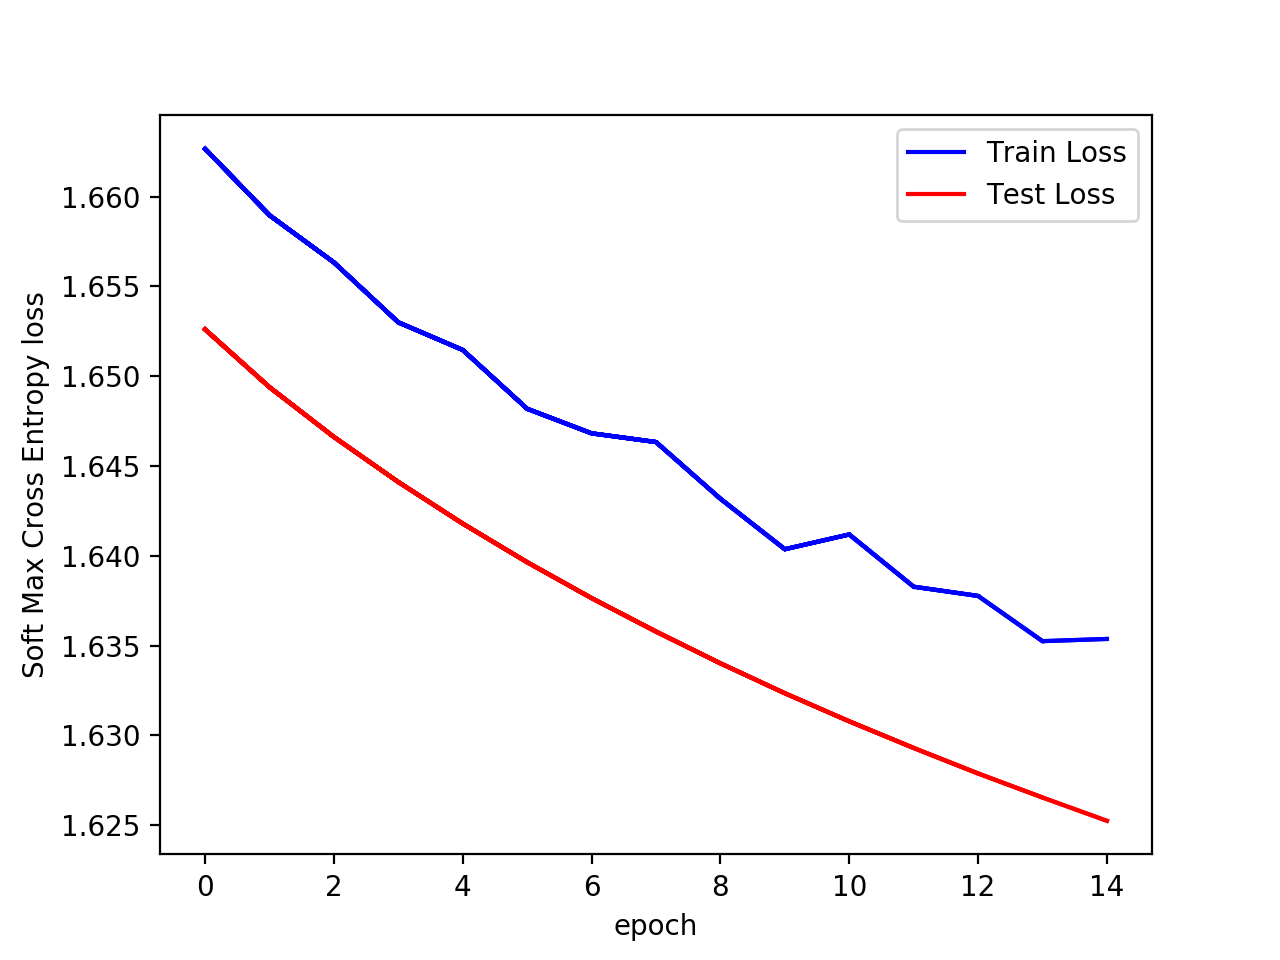

Accuracy: 0.9008


In [35]:
# summarizing everything in single cell
training_epochs = 15
batch_size = 1000
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_predicted_is, labels = y_true_is))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
epochs_list, avg_train_loss_list, avg_test_loss_list = [], [], []
for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # cross entropy is used for calculating training loss, c is the training loss returned
            _, c = sess.run([train_step, cross_entropy], feed_dict={x_is: batch_xs, y_true_is: batch_ys})
            train_avg_cost += c / total_batch
            # here we are calculating test loss on the W's which are intermediate, to show it on the graph
            c = sess.run(cross_entropy, feed_dict={x_is: mnist.test.images, y_true_is: mnist.test.labels})
            # c is the returned test loss, and we are calculating avg test loss by total_batch
            test_avg_cost += c / total_batch

        epochs_list.append(epoch)
        avg_train_loss_list.append(train_avg_cost)
        avg_test_loss_list.append(test_avg_cost)
        plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax)
        

plt_dynamic(epochs_list, avg_train_loss_list, avg_test_loss_list, ax)
correct_prediction = tf.equal(tf.argmax(y_predicted_is,1), tf.argmax(y_true_is,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x_is: mnist.test.images, y_true_is: mnist.test.labels}))

In [ ]:
# END